> Created on Tue May 26 21:07:04 2020  @author: Richie Bao-caDesign设计(cadesign.cn) __+updated on Mon Jul 13 10:10:44 2020 by Richie Bao

## 1. 标准误，中心极限定理，t分布，统计显著性，效应量，置信区间；公共健康数据的地理空间分布与相关性分析
### 1.1 标准误，中心极限定理，t分布，统计显著性，效应量，置信区间 
#### 1.1.1 标准误

定义：标准误是某一统计量（例如均值、两个均值只差、相关系数等）抽样分布（sampling distribution）的标准差（即样本均值的标准差，而不是样本的标准差），度量了从同一总体中抽取相同容量样本的预期随机差异。在下述代码中，从服从平均值为30，标准差为5的正态分布中，随机提取2000个样本（sample），各个样本容量为1000，并计算每一样本的均值，查看这2000个样本的均值分布，即均值抽样分布（sampling distribution of the mean）。普通分布具有均值和标准差，在均值的抽样分布中，均值则称为均值的期望值（expected value of the mean），这是因为样本均值的最佳猜测与总体均值一致，下述代码中计算了均值抽样分布的均值几乎与总体（population）一样，证明了这一点。均值抽样分布的标准差则称为标准误。标准差是分布中的单个取值与分布均值之间的平均差异或平均离差，均值的标准误提供了同样的信息，只是单个样本均值与其期望值之间的平均差异，可以理解为对样本均值代表实际总体均值的确信程度，有助于确定样本统计值（例如样本均值）与总体参数（例如总体均值）之间的差异是否有意义。同时计算了均值抽样分布标准计分的kstest正态性检验，每次代码运行产生的数据是符合上述条件下的随机值，其pvalue是变化的，但通常高于0.5，即>0.05，因此可以判断均值抽样分布符合正态分布。

均值标准误的计算公式：

 $\sigma _{ \overline{x} }= \frac{ \sigma }{ \sqrt{n} } $或 $S _{ \overline{x} }= \frac{s }{ \sqrt{n} }$，其中$\sigma$为总体标准差，$s$为标准差的样本估计，$n$为样本容量。因为通常$\sigma$总体的标准差未知，因此用标准差的样本估计，计算标准误。

> 参考：Timothy C.Urdan.Statistics in Plain English (白话统计学)[M].中国人民大学出版社.2013,12.第3版.

sample_mus mu:30.00,sigma:0.11
sampling distribution of the mean - kstest statistic:0.01,pvalue:0.96
standard error of mean: 0.00248975473591512
standard error of mean_scipy.stats.sem(): 0.00248975473591512


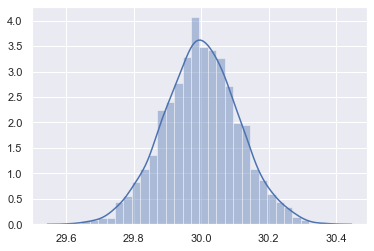

In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import math
sns.set()
mu,sigma=30,5
sample_size=2000
sample_mus=np.array([np.random.normal(mu, sigma, sample_size).mean() for i in range(2000)]) #从服从平均值为30，标准差为5的正态分布中，随机提取2000个样本，每个样本容量为1000的样本，并计算每一样本的均值
bins=30
sns.distplot(sample_mus,bins=bins) #查看2000个样本均值分布
print("sample_mus mu:%.2f,sigma:%.2f"%(sample_mus.mean(),sample_mus.std()))
kstest_test=stats.kstest(stats.zscore(sample_mus),cdf='norm')
print("sampling distribution of the mean - kstest statistic:%.2f,pvalue:%.2f"%kstest_test)
print("standard error of mean:",sample_mus.std()/math.sqrt(sample_size) ) #计算标准误
print("standard error of mean_scipy.stats.sem():",stats.sem(sample_mus,ddof=0)) #使用scipy.stats库直接计算标准误

单个样本的容量越大，就越接近于总体，均值抽样分布的均值越趋近于总体均值，而其标准差即标准误越小，即表明样本均值的统计量（或计算其它的统计量）能够代表总体的该统计量，对总体的估计也就越准确。利用下述代码分析上述观点，计算多个不用样本容量均值抽样分布的标准误，随着样本容量的增加，标准误迅速的减小后逐步趋于缓和，说明单个样本容量越大，越接近总体，对总体的估计越准确。

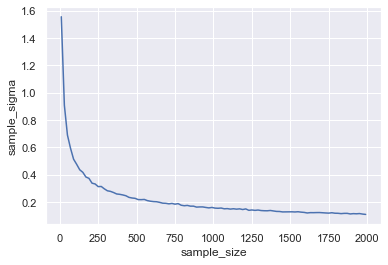

In [2]:
import matplotlib.pyplot as plt 
sample_mu_list=[]
sample_sigma_list=[]
sample_size_list=list(range(10,2000,20))
for sample_size in sample_size_list:
    sample_size_mu=np.array([np.random.normal(mu, sigma, sample_size).mean() for i in range(2000)])
    sample_mu_list.append(sample_size_mu.mean())
    sample_sigma_list.append(sample_size_mu.std())
ax=sns.lineplot(x=sample_size_list,y=sample_sigma_list)  
ax.set(xlabel='sample_size',ylabel='sample_sigma')
plt.show()

#### 1.1.2 中心极限定理
中心极限定义（central limit theorem）表明，只要样本容量足够大，即使样本取值的总体分布不是正态分布，均值的抽样分布也服从正态分布。或理解为不管样本总体服从什么分布，当样本数量足够大时，样本的均值以正态分布的形式围绕总体均值波动。为验证中心极限，使用百度POI数据，提取美食的价格数据，在正态分布与概率密度函数一节，已经通过正态性检验确定了该美食价格数据集为非正态分布，下述代码重现了kstest正态性检验，pvalue=5.153632014592587e-26，小于0.05，拒绝原假设，即不符合正态分布。而从该数据集中随机抽取单个样本容量为350，总共2000个样本，计算均值抽样分布后的kstest正态性检验，其值pvalue通常大于0.5，即均值抽样分布为正态分布，满足中心极限定义。

很多统计量都依赖于从正态分布中得到概率，而中心极限定理确定了足够多的样本均值服从正态分布（即使总体分布不是正态的），即均值抽样分布为正态分布，因此这一定理使得众多统计量的概率计算成为可能。

original data mean:47.70
original data kstest: KstestResult(statistic=0.11464960111854455, pvalue=5.153632014592587e-26)
sample_mus mu:47.70,sigma:1.67
sample_mus kstest statistic:0.01,pvalue:0.93


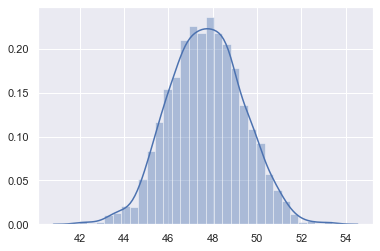

In [3]:
import util
import pandas as pd
poi_gpd=pd.read_pickle('./data/poiAll_gpd.pkl') #读取已经存储为.pkl格式的POI数据，其中包括geometry字段，为GeoDataFrame地理信息数据，可以通过poi_gpd.plot()迅速查看数据。
delicacy_price=poi_gpd.xs('poi_0_delicacy',level=0).detail_info_price  #提取美食价格数据
delicacy_price_df=delicacy_price.to_frame(name='price').astype(float) 
delicacy_price_df_clean=delicacy_price_df.dropna()
_,delicacyPrice_outliersDrop=util.is_outlier(delicacy_price_df_clean.price,threshold=3.5) #将异常值处理函数放置于util.py文件中，直接调用。见异常值处理一节

delicacy_price_array_dropna=delicacyPrice_outliersDrop.to_numpy().reshape(-1)
print("original data mean:%.2f"%delicacy_price_array_dropna.mean())

print("original data kstest:",stats.kstest(stats.zscore(delicacy_price_array_dropna),cdf='norm')) #计算标准化后的kstest正态性检验

delicacy_price_sample_mus=np.array([np.random.choice(delicacy_price_array_dropna,350).mean() for i in range(2000)])
sns.distplot(delicacy_price_sample_mus,bins=bins)
print("sample_mus mu:%.2f,sigma:%.2f"%(delicacy_price_sample_mus.mean(),delicacy_price_sample_mus.std()))
kstest_test=stats.kstest(stats.zscore(delicacy_price_sample_mus),cdf='norm')
print("sample_mus kstest statistic:%.2f,pvalue:%.2f"%kstest_test)

#### 1.1.3 t分布 (Student's t-distribution)
如果要使用正态分布，通过z-score（标准计分）获得精确概率，至少需要满足两个条件，一个是，$\sigma$总体标准差已知；另一个是，大样本（即样本容量足够大）。如果上述条件均不满足，则需要考虑样本容量，这就用到t分布。t分布的形状受样本容量影响，大样本条件下，t分布与正态分布的形状几何完全一样，而随样本容量减少，t分布的形状变得中间更平坦，两端更粗厚，即均值周围的取值变得更少，而远离均值，位于分布尾部的取值变得更多。以scipy库scipy.stats.t给出的案例来观察t分布，其代码方法与正态分布基本相同，可以互相比较查看之间的差异。

t分布中，增加了一个新的参数自由度（degree of freedom,df），通常用符号$\nu $来表示，当以样本的统计量来估计总体的参数时，对N个随机样本而言，其自由度为N-1。

数据集为正态分布，给定一个取值，计算该取值的z-score后，就可以获得该取值的概率。而在t分布下，要获取对应取值的概率，则需要计算t值（t统计量），其公式定义为：$t= \frac{ \overline{X} - \mu }{S _{ \overline{x} }} $,其中$\mu$为总体均值，$\overline{X}$为样本均值，${S _{ \overline{x} }}$为标准误的样本估计。知道t值，以及自由度（样本容量N-1），可以查t值表得到该取值的概率。当然，目前直接使用scipy等库计算，无需再计算t值以及对应查表。

mean, var, skew, kurt= (array(0.), array(3.7027027), array(nan), array(inf))
验证累计分布函数CDF返回值与其PPF返回值是否相等或近似： True


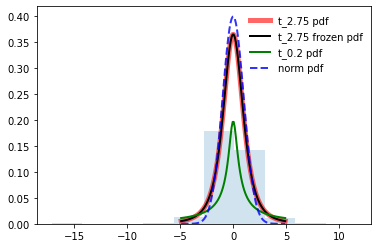

In [2]:
from scipy.stats import norm
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots(1, 1)
df=2.74 #配置自由度
mean, var, skew, kurt=t.stats(df, moments='mvsk') #查看服从t分布的相关统计量
print('mean, var, skew, kurt=',(mean, var, skew, kurt))

x=np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100) #获取服从自由度df，概率位于1%到99%的100个取值
ax.plot(x, t.pdf(x, df),'r-', lw=5, alpha=0.6, label='t_2.75 pdf')

rv=t(df) #指定固定自由度
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='t_2.75 frozen pdf')

rv_10=t(0.2) #指定固定自由度
ax.plot(x, rv_10.pdf(x), 'g-', lw=2, label='t_0.2 pdf')

vals=t.ppf([0.001, 0.5, 0.999], df) #返回概率为0.1%、50%和99.9%的取值
print("验证累计分布函数CDF返回值与其PPF返回值是否相等或近似：",np.allclose([0.001, 0.5, 0.999], t.cdf(vals, df)))

r=t.rvs(df, size=1000) #获取服从自由度df的1000个随机取值
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)


#比较标准正态分布
x_nd=np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x), 'b--', lw=2, alpha=0.8, label='norm pdf')

ax.legend(loc='best', frameon=False)
plt.show()

In [5]:
#如果需要计算服从t分布的概率则指定df，以及loc（均值，默认为0）和scale(标准差，默认为1)
print("用.cdf计算值小于或等于113的概率为：",t.cdf(113,df=999,loc=100,scale=12)) 
print("用.sf计算值大于或等于113待概率为：",t.sf(113,df=999,loc=100,scale=12)) 
print("可以观察到.cdf（<=113）概率结果+.sf(>=113)概率结果为：",t.cdf(113,df=999,loc=100,scale=12)+t.sf(113,df=999,loc=100,scale=12))
print("用.ppf找到给定概率值为98%的数值为：",t.ppf(0.81766,df=999,loc=100,scale=12))

用.cdf计算值小于或等于113的概率为： 0.8605390547558804
用.sf计算值大于或等于113待概率为： 0.13946094524411956
可以观察到.cdf（<=113）概率结果+.sf(>=113)概率结果为： 1.0
用.ppf找到给定概率值为98%的数值为： 110.88276310459135


#### 1.1.4 统计显著性
使用scipy库建立服从均值为100，标准差为12的正态分布。绘制样本容量为1000的单个样本的随机取值分布；同时绘制样本容量为1000，2000个样本的均值抽样分布。计算2000个样本均值抽样分布的标准差，将其作为绘制t分布的标准差，均值保持不变为100，自由度为1999（即样本容量为2000，等于均值抽样分布的样本数量）。观察均值抽样分布与对应的t分布（同均值和标准差，以及自由度为均值抽样分布的样本数），曲线形状基本保持一致，再一次验证中心极限定理。在这样本容量为1000的2000个样本中，可以依据t分布估计样本均值概率小于0.05（5%）的取值为 99.387，大于0.95（95%）的取值为100.641。就此我们能够估计取值小于99.387或者大于100.641的样本均值出现的概率（机率）小于5%（0.05）。

如果我们不是根据概率获取对应的取值（即样本均值），而是估计取值的概率，例如估计样本均值小于或者等于99.0的概率为多少，计算结果为0.00439。这个概率值是否能确定，样本统计量（例如样本均值）与总体参数（例如总体均值）之间某种差异（例如样本均值为99.0，而总体均值为100，100-99.0=1.0的差异），是否仅仅由随机抽样误差或偶然因素导致？惯例是取概率P值p-value=0.05作为一个水平的界限，这一水平就为，即当原假设为真时所得到的样本观察结果或更极端结果出现的概率，其P值很小，说明原假设发生的概率很小，根据小概率原理，0.00439<0.05，有理由拒绝原假设，P值越小，拒绝原假设的理由越充分，就是说样本均值为99.0与总体均值之间的差异不是偶然的，得出结论认为99.0的样本均值实际上异于总计均值，从该样本中观察到的相关情况不能代表总体中的实际现象。

对于上述过程，可转换为假设检验的推断过程，提出一种假设并确立一种准则用于决定保留或拒绝假设。假设样本均值不异于总体均值为原假设即零假设（null hypothesis,$H_{0} $），零假设一般指总体中的效应不存在（总体均值与样本均值不会不同），符号表示为：$H_{0} : \mu = \overline{X} $，其中$ \mu$为总体均值，$\overline{X}$为样本均值。而如果假设样本均值异于总体均值，则为对立假设（一种替代假设），符号表示为：$H_{A} : \mu  \neq  \overline{X} $。样本均值趋向于等同总体均值，但是因为毕竟不是总体，之间总会存在差异，引起这个差异的原因就是随机抽样误差或偶然因素，这正是均值抽样分布呈正态性的内在原因。其p-value<=0.05的概率即对应着显著性水平（α，alpha level），例如样本均值99.0的概率为0.00439，小于显著性水平α，拒绝零假设，样本均值异于总体均值，其结果是统计显著的（指在原假设为真的条件下，用于检验的样本统计量的值落在了拒绝域内，做出了拒绝原假设的决定）。显著性水平常用的除了0.05，还有0.01.

在上述计算过程中，计算有概率小于0.025，和大于0.975的两种情况，如果同时包括两种情况，则为双尾检测，仅有一种情况，但是概率需要小于0.05或者大于0.95的情况下为单尾检测。

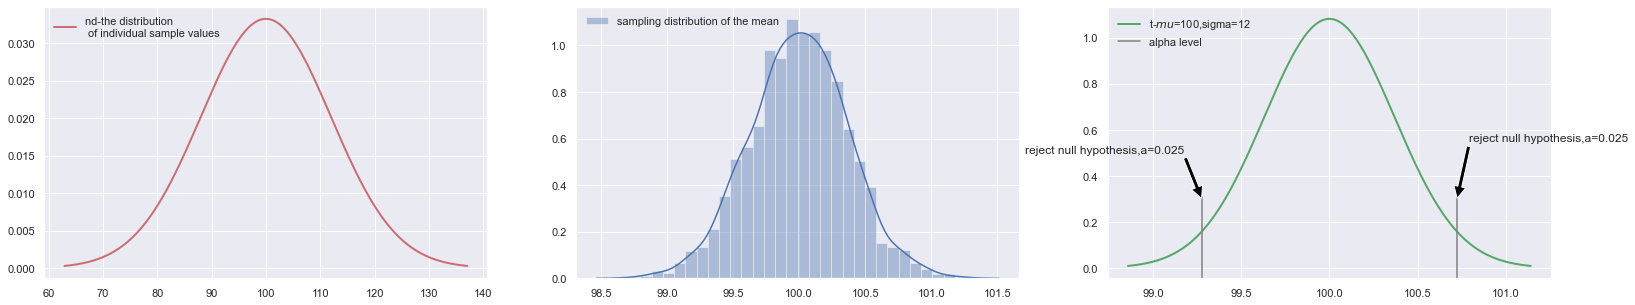

用.ppf找到给定概率值为5%的数值为： 99.27672192134695
用.ppf找到给定概率值为95%的数值为： 100.72327807865305
用.cdf计算值小于或等于99的概率为： 0.003377883090124475


In [6]:
import matplotlib.pyplot as plt
df,loc,scale,sample_size=1999,100,12,1000

#绘制样本容量为1000的单个样本的随机取值分布
x=np.linspace(norm.ppf(0.001, loc=loc,scale=scale),norm.ppf(0.999, loc=loc,scale=scale), sample_size)
fig, axs=plt.subplots(1,3,figsize=(27,5))
axs[0].plot(x, norm.pdf(x,loc=loc,scale=scale),'r-', lw=2, alpha=0.8, label='nd-the distribution \n of individual sample values')
axs[0].legend(loc='upper left', frameon=False)

#绘制样本容量为1000，2000个样本的均值抽样分布
samples=np.array([norm.rvs(loc=loc,scale=scale,size=sample_size).mean() for i in range(df+1)])
bins=30
sns.distplot(samples,bins=bins,ax=axs[1],label='sampling distribution of the mean')
axs[1].legend(loc='upper left', frameon=False)

#计算2000个样本均值抽样分布的标准差，作为绘制t分布的标准差，均值保持保持保持不变为100，自由度为1999（即样本容量为2000，等于均值抽样分布的样本数量）
samples_std=samples.std()
t_x=np.linspace(t.ppf(0.001, df=df,loc=loc,scale=samples_std),t.ppf(0.999, df=df,loc=loc,scale=samples_std), df+1)  #获取服从自由度df，概率位于1%到99%的100个取值
t_rv=t(df=df,loc=loc,scale=samples_std) #指定固定自由度
axs[2].plot(t_x, t_rv.pdf(t_x), 'g-', lw=2, label='t-$mu$=%d,sigma=%d'%(loc,scale))

#显著性水平为0.05时，曲线区间绘制
pValue_5percent=t.ppf(0.025,df=df,loc=loc,scale=samples_std)
pValue_95percent=t.ppf(0.975,df=df,loc=loc,scale=samples_std)
axs[2].axvline(pValue_5percent, 0,0.3,c='gray',label='alpha level')
axs[2].axvline(pValue_95percent, 0,0.3,c='gray')
axs[2].annotate('reject null hypothesis,a=%.3f'%0.025,xy=(pValue_5percent,0.3),xytext=(pValue_5percent-0.1, 0.5),arrowprops=dict(facecolor='black', shrink=0.01),horizontalalignment='right',)
axs[2].annotate('reject null hypothesis,a=%.3f'%0.025,xy=(pValue_95percent,0.3),xytext=(pValue_95percent+0.07, 0.55),arrowprops=dict(facecolor='black', shrink=0.01),horizontalalignment='left',)
axs[2].legend(loc='upper left', frameon=False)

plt.show()

print("用.ppf找到给定概率值为5%的数值为：",pValue_5percent)
print("用.ppf找到给定概率值为95%的数值为：",pValue_95percent)
print("用.cdf计算值小于或等于99的概率为：",t.cdf(99.0,df=df,loc=loc,scale=samples_std))

#### 1.1.5 效应量
效应量（effect size）是量化现象强度的数值。其绝对值越大表示效应越强，也就是现象越明显。对于均值抽样分布，效应量的计算公式为：$d=\frac{ \overline{X} - \mu }{s}$，其中$d$为效应量，$ \overline{X}$为样本均值，$\mu$为总体均值，$s$为标准差的样本估计。效应量所代表的就是以标准差为单位所度量的差异，这个与标准计分（z-score）非常相似，标准计分是以标准差为单位，从感兴趣的点到均值之间有多少个标准差。关于效应量是否有意义时，所建议的效应量值的区间也所有差异，关键是检验什么以及所持观点，一般而言效应量小于0.20算小，在0.25~0.75之间算中等，超过0.80算大。对于样本均值99的效应量计算结果为-2.613，其绝对值大于0.8，表明样本均值99到总体均值100之间所差的100-99=1的差异，按照标准差为单位，效应量显著，即样本均值99远离总体均值100。

In [7]:
print("样本均值99的效应量：",(99-100)/samples_std)

样本均值99的效应量： -2.7114763713325534


#### 1.1.6 置信区间
一个概率样本的置信区间（Confidence interval, CI），是对产生这个样本的总体的餐宿分布（Parametric Distribution）中的某一个位置参数值，以区间的形式给出估计。对于现实中均值抽样分布，实际上总体的均值（总体参数的实际值）并不知道，我们所拥有的只是样本数据，而通过样本数据是可以估计总体均值，给出总体均值分布的区间，这个区间即为置信区间。计算公式为：$C I_{95}= \overline{X}   \pm ( t_{95} )( s_{ \overline{X} })$ 和$C I_{99}= \overline{X}   \pm ( t_{99} )(s_{ \overline{X} } )$，其中$C I_{95}$为95%置信区间； $C I_{99}$为99%置信区间； $\overline{X}$为样本均值； $ s_{ \overline{X} }$；为标准误； $t_{95} $为给定自由度条件下，$a$水平为0.05的双尾检验所对应的t值； $t_{99} $为给定自由度条件下，$a$水平为0.01的双尾检验所对应的t值。

对于置信区间的计算可以直接使用scipy库。

In [8]:
print("0.05_置信区间：",stats.t.interval(0.95, len(samples)-1, loc=np.mean(samples), scale=stats.sem(samples)))
print("0.01_置信区间：",stats.t.interval(0.99, len(samples)-1, loc=np.mean(samples), scale=stats.sem(samples)))

0.05_置信区间： (99.98168869487951, 100.01404276341803)
0.01_置信区间： (99.97659806886004, 100.0191333894375)


### 1.2 相关性
#### 1.2.1 相关性指标与相关系数

如果要判断两个变量之间是否相互联系，则需要计算相关系数。在变量之间相关性分析时，涉及到三种情况，包括数值数据与数值数据、数值数据与分类数据，以及分类数据与分类数据。因此不同的变量类型之间的相关性计算指标有所差异：

| 数据类型  | 指标  | 值的范围  | 计算公式  | 说明  |
|---|---|---|---|---|
| 数值数据和数值数据  | 相关系数  |  -1~1 |$ r=\frac{ S_{xy} }{ \sqrt{ S_{xx}\cdot S_{yy} } } = \frac{ \sum_{i=1}^n ( x_{i}-  \overline{x}   )( y_{i}- \overline{y}  ) }{  \sqrt{ \sum_{i=1}^n ( x_{i} -\overline{x})^{2} } \cdot \sum_{i=1}^n ( y_{i} -\overline{y})^{2} }  \in [-1,1] $ |  其中$S_{xx}$叫做$x$的变异数（Variance），$S_{yy}$ 叫做$y$的变异数，$S_{xy}$叫做$x$和$y$的共变异数（Covariance）|
| 数值数据和分类数据  | 相关比  | 0~1  |  $WSS= \sum_{k=1}^K S_{ x^{k}  x^{i} } = \sum_{k=1}^K  \sum_{i=1}^{ n_{i} }  ( x_i^k - \overline{ x^{k} }  ) ^{2}  $ $BSS= \sum_{k=1}^K n_{k}  ( \overline{ x^{k} } - \overline{x} )^{2}  $ $cr=\frac{BSS}{BSS+WSS} $ | 设共有n个数值数据，它们被分成了K个类别，$x_1^1,x_2^1, \cdots, x_{ n_{1} } ^1;x_1^2,x_2^2, \cdots, x_{ n_{2} } ^2;\cdots;x_1^K,x_2^K, \cdots, x_{ n_{K} } ^K$,其中$n_{K} $代表第$K$个类别的数值的个数，记$ \overline{ x^{k}}$为第K个类别数值的均值，$\overline{x}$为所有数据的均值。BSS（between sum of squares）为组间变异，WSS（within sum of squares）组内变异  |
| 分类数据和分类数据  | 克莱姆相关系数  | 0~1  | $ \chi ^{2} = \sum_{i,j}^{}  \frac{ ( n_{ij}- \frac{ n_{i}  n_{j} }{n}  )^{2} }{ \frac{ n_{i}  n_{j} }{n} } $ $V= \sqrt{ \frac{  \chi ^{2}/n }{min(k-1,r-1)} } $ | 设有两个类别变量A和B，观测样本总数为$n$，对于$i=1,\cdots, r;j=1,\cdots,k $， $n_{ij}$ 为$( A_{i}, B_{j}  )$的观测次数（频数），$k$为观察次数表列，$r$为其行。$ \frac{ n_{i}  n_{j} }{n}$为计算期望次数|

对于数值数据和数值数据之间的相关性分析，使用相关系数计算（通常为Pearson's r，即皮尔森相关系数 r，为线性相关）。先建立简单数据集，数据来源于《漫画统计学》询问10名20多岁女性的化妆品费和置装费。以要分析的两个变量为x和y值，打印散点图观察点的分布是否存在规律，可以比较明显的观察到点的分布似乎沿一条隐藏的倾斜直线分布，可以初步判断化妆品费和置装费之间存在关联。

> 皮尔森相关系数，又称积差相关系数、积矩相关系数（Pearson product-moment correlation coefficient，PPMCC或PCCs）

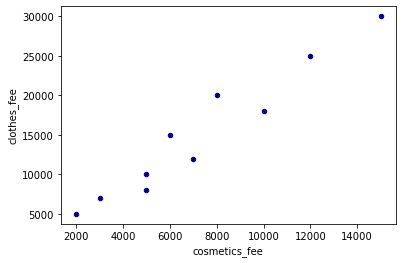

In [3]:
import pandas as pd
dressUp_cost={'name':["miss_A","miss_B","miss_C","miss_D","miss_E","miss_F","miss_G","miss_H","miss_I","miss_J"],
              "cosmetics_fee":[3000,5000,12000,2000,7000,15000,5000,6000,8000,10000],
             "clothes_fee":[7000,8000,25000,5000,12000,30000,10000,15000,20000,18000]
             }
dressUp_cost_df=pd.DataFrame.from_dict(dressUp_cost)
dressUp_cost_df.plot.scatter(x='cosmetics_fee',y='clothes_fee',c='DarkBlue')
plt.show()

使用上述公式计算相关系数。

> 人工计算的过程有助于理解概念及公式。

In [12]:
import math
dressUp_cost_df["xSx_mean"]=dressUp_cost_df.cosmetics_fee.apply(lambda row: row-dressUp_cost_df.cosmetics_fee.mean()) 
dressUp_cost_df["ySy_mean"]=dressUp_cost_df.clothes_fee.apply(lambda row: row-dressUp_cost_df.clothes_fee.mean())
dressUp_cost_df["square_xSx_mean"]=dressUp_cost_df.xSx_mean.apply(lambda row: math.pow(row,2))
dressUp_cost_df["square_ySy_mean"]=dressUp_cost_df.ySy_mean.apply(lambda row: math.pow(row,2))
dressUp_cost_df["xSx_meanMySy_mean"]=dressUp_cost_df.xSx_mean*dressUp_cost_df.ySy_mean
print(dressUp_cost_df)
r=dressUp_cost_df.xSx_meanMySy_mean.sum()/math.sqrt(dressUp_cost_df.square_xSx_mean.sum()*dressUp_cost_df.square_ySy_mean.sum())
print("Pearson's r:",r)

     name  cosmetics_fee  clothes_fee  xSx_mean  ySy_mean  square_xSx_mean  \
0  miss_A           3000         7000   -4300.0   -8000.0       18490000.0   
1  miss_B           5000         8000   -2300.0   -7000.0        5290000.0   
2  miss_C          12000        25000    4700.0   10000.0       22090000.0   
3  miss_D           2000         5000   -5300.0  -10000.0       28090000.0   
4  miss_E           7000        12000    -300.0   -3000.0          90000.0   
5  miss_F          15000        30000    7700.0   15000.0       59290000.0   
6  miss_G           5000        10000   -2300.0   -5000.0        5290000.0   
7  miss_H           6000        15000   -1300.0       0.0        1690000.0   
8  miss_I           8000        20000     700.0    5000.0         490000.0   
9  miss_J          10000        18000    2700.0    3000.0        7290000.0   

   square_ySy_mean  xSx_meanMySy_mean  
0       64000000.0         34400000.0  
1       49000000.0         16100000.0  
2      100000000.0   

使用scipy库直接计算，其结果保持一致。

In [13]:
from scipy import stats
r_=stats.pearsonr(dressUp_cost_df.cosmetics_fee,dressUp_cost_df.clothes_fee)
print(
    "pearson's r:",r_[0],"\n",
    "p_value:",r_[1]
     )

pearson's r: 0.968019612860768 
 p_value: 4.402991448166131e-06


相关系数的强弱并没有严格的规定，通常需要根据具体的应用背景和目的确定，例如复杂多变因素影响的变量，0.9的值则是相当高的。对于相关系数值的意义不同的文献给出的参考意义也有所差别，这里给出《漫画统计学》里的划分：

| 相关系数的绝对值  | 若细分  | 若大体上划分  |  
|---|---|---|
| 1.0~0.9  |  非常强 |  相关 |   
| 0.9~0.7  | 有点强  |  相关 |   
|0.7~0.5   | 有点弱  |  相关 |   
| 未满0.5  |  非常弱 | 不相关  |   


以及Wikipedia给出的参考：

| 相关性  | 负  | 正  |  
|---|---|---|
| 无  | −0.09 to 0.0 | 0.0 to 0.09  |   
| 弱  | −0.3 to −0.1  | 0.1 to 0.3 |   
|中   |−0.5 to −0.3  | 0.3 to 0.5 |   
| 强  | −1.0 to −0.5 |0.5 to 1.0   | 

若相关系数接近$ \pm1 $，则相关性越强，如果接近0，则相关性越弱。如果为正，则为正相关，如果为负，则为负相关。

通过计算相关系数，获得结果r=0.968，说明抽样的10名20多岁女性在化妆品费和置装费这两个变量间存在强相关性，那么该值是否代表其抽样的总体（所有女性）中两个变量（化妆品费和置装费）间也存在非常强的相关关系？为了确认这个现象，需要检验相关系数是否统计显著。提出零假设，代表总体下两个变量（化妆品费和置装费）之间完全无关，即总体的相关系数为0。通常用t分布来检验相关系数是否统计显著，进行t检验。其t值的计算公式为：$t=r \sqrt{ \frac{N-2}{1- r^{2} } } $，其中自由度为$N-2$，即样本对象数减去2，即N-2=10-2=8。使用t分布的累计分布函数t.cdf()或者t.sf()计算P值，因为双尾检查，因此再乘以2，其计算结果与stats.pearsonr()计算相关系数时给出的P值保持一致。因为p_value=4.402991448104743e-06<0.05，因此拒绝原假设，即拒绝总体下两个变量（化妆品费和置装费）之间完全无关，就是说总体下两个变量是相关的。因此所计算的相关系数值为0.968说明了总体所有女性在化妆品费和置装费的消费上是强关联的，如果一个女性花费较多的钱在化妆品费上，那么她花费在置装费的钱也相对较多，反之亦然。

In [37]:
t_value=r*math.sqrt((10-2)/(1-math.pow(r,2)))
print("p_value_cdf:",(1-stats.t.cdf(t_value,10-2))*2)
print("p_value_sf:",stats.t.sf(t_value,10-2)*2)

p_value_cdf: 4.402991448104743e-06
p_value_sf: 4.402991448166121e-06


### 1.3 公共健康数据的地理空间分布与相关性分析
#### 1.3.1 公共健康数据的地理空间分布
公共健康数据为芝加哥社区选定的公共健康（卫生）指标（public health indicator）。该数据集包括27项重要的公共健康指标，这些指标为比率、百分比、或者出生率、死亡率、传染病、铅中毒以及经济状况相关的指标。该数据集是按照社区进行统计，在字段中给出了社区名，因此可以将数据按照社区名配对到各个社区范围的地理空间数据上。芝加哥社区边界以及公共健康数据均来源于[Chicago Data Portal，CDP](https://data.cityofchicago.org/)。关于数据的细节描述可以参考CDP提供的文件。

在JupyterLab中打印数据的方式，包括print()和直接将要显示数据的变量放置于单个单元格（cell）最后两种方式。但是前者显示为固定宽度，不能按照屏幕宽度自动缩放，后者虽为100%宽度自动缩放显示，但是如果要将.ipynb的Jupyter文件输出为.md的Mardown文件，可能会产生乱码。因此，可以使用`from IPython.display import HTML`，将要显示的数据转换为HTML格式数据后，会解决上述两种问题。

In [15]:
import pandas as pd
dataFp_dic={
    "ublic_Health_Statistics_byCommunityArea_fp":r'./data/Public_Health_Statistics-_Selected_public_health_indicators_by_Chicago_community_area.csv',
    "Boundaries_Community_Areas_current":r'./data/geoData/Boundaries_Community_Areas_current.shp',    
}

pubicHealth_Statistic=pd.read_csv(dataFp_dic["ublic_Health_Statistics_byCommunityArea_fp"])

#中英对照表（字段映射表）
PubicHealth_Statistic_columns={'Community Area':'社区', 
                                'Community Area Name':'社区名',
                                'Birth Rate':'出生率',
                                'General Fertility Rate':'一般生育率',
                                'Low Birth Weight':'低出生体重',
                                'Prenatal Care Beginning in First Trimester':'产前3个月护理', 
                                'Preterm Births':'早产',
                                'Teen Birth Rate':'青少年生育率',
                                'Assault (Homicide)':'攻击（杀人）',
                                'Breast cancer in females':'女性乳腺癌',
                                'Cancer (All Sites)':'癌症', 
                                'Colorectal Cancer':'结肠直肠癌',
                                'Diabetes-related':'糖尿病相关',
                                'Firearm-related':'枪支相关',
                                'Infant Mortality Rate':'婴儿死亡率', 
                                'Lung Cancer':'肺癌',
                                'Prostate Cancer in Males':'男性前列腺癌',
                                'Stroke (Cerebrovascular Disease)':'中风(脑血管疾病)',
                                'Childhood Blood Lead Level Screening':'儿童血铅水平检查',
                                'Childhood Lead Poisoning':'儿童铅中毒',
                                'Gonorrhea in Females':'女性淋病', 
                                'Gonorrhea in Males':'男性淋病', 
                                'Tuberculosis':'肺结核',
                                'Below Poverty Level':'贫困水平以下', 
                                'Crowded Housing':'拥挤的住房', 
                                'Dependency':'依赖',
                                'No High School Diploma':'没有高中文凭', 
                                'Per Capita Income':'人均收入',
                                'Unemployment':'失业',
                                }

def print_html(df,row_numbers=5):
    from IPython.display import HTML
    '''
    function - 在Jupyter中打印DataFrame格式数据为HTML
    
    Paras:
    df - 需要打印的DataFrame或GeoDataFrame格式数据
    row_numbers - 打印的行数，如果为正，从开始打印如果为负，从末尾打印
     '''
    if row_numbers>0:
        return HTML(df.head(row_numbers).to_html())
    else:
        return HTML(df.tail(abs(row_numbers)).to_html())
print_html(pubicHealth_Statistic,6)

在数据合并时，公共健康数据以"Community Area"为对位列，社区边界数据以"area_numbe"为对位列，使用df.merge()方法完成融合。打印了两组数据，其中肺癌（Lung Cancer）为每100,000人所占的比例。GeoDataFrame格式数据在打印时如果需要在图上每个polygon上标注数据，以及增加地图的信息量，可以按照下述代码对应行的方式处理

area           float64
area_num_1      object
area_numbe      object
comarea        float64
comarea_id     float64
community       object
perimeter      float64
shape_area     float64
shape_len      float64
geometry      geometry
dtype: object
__________________________________________________
boundaries_community.area_numbe dtype: int64


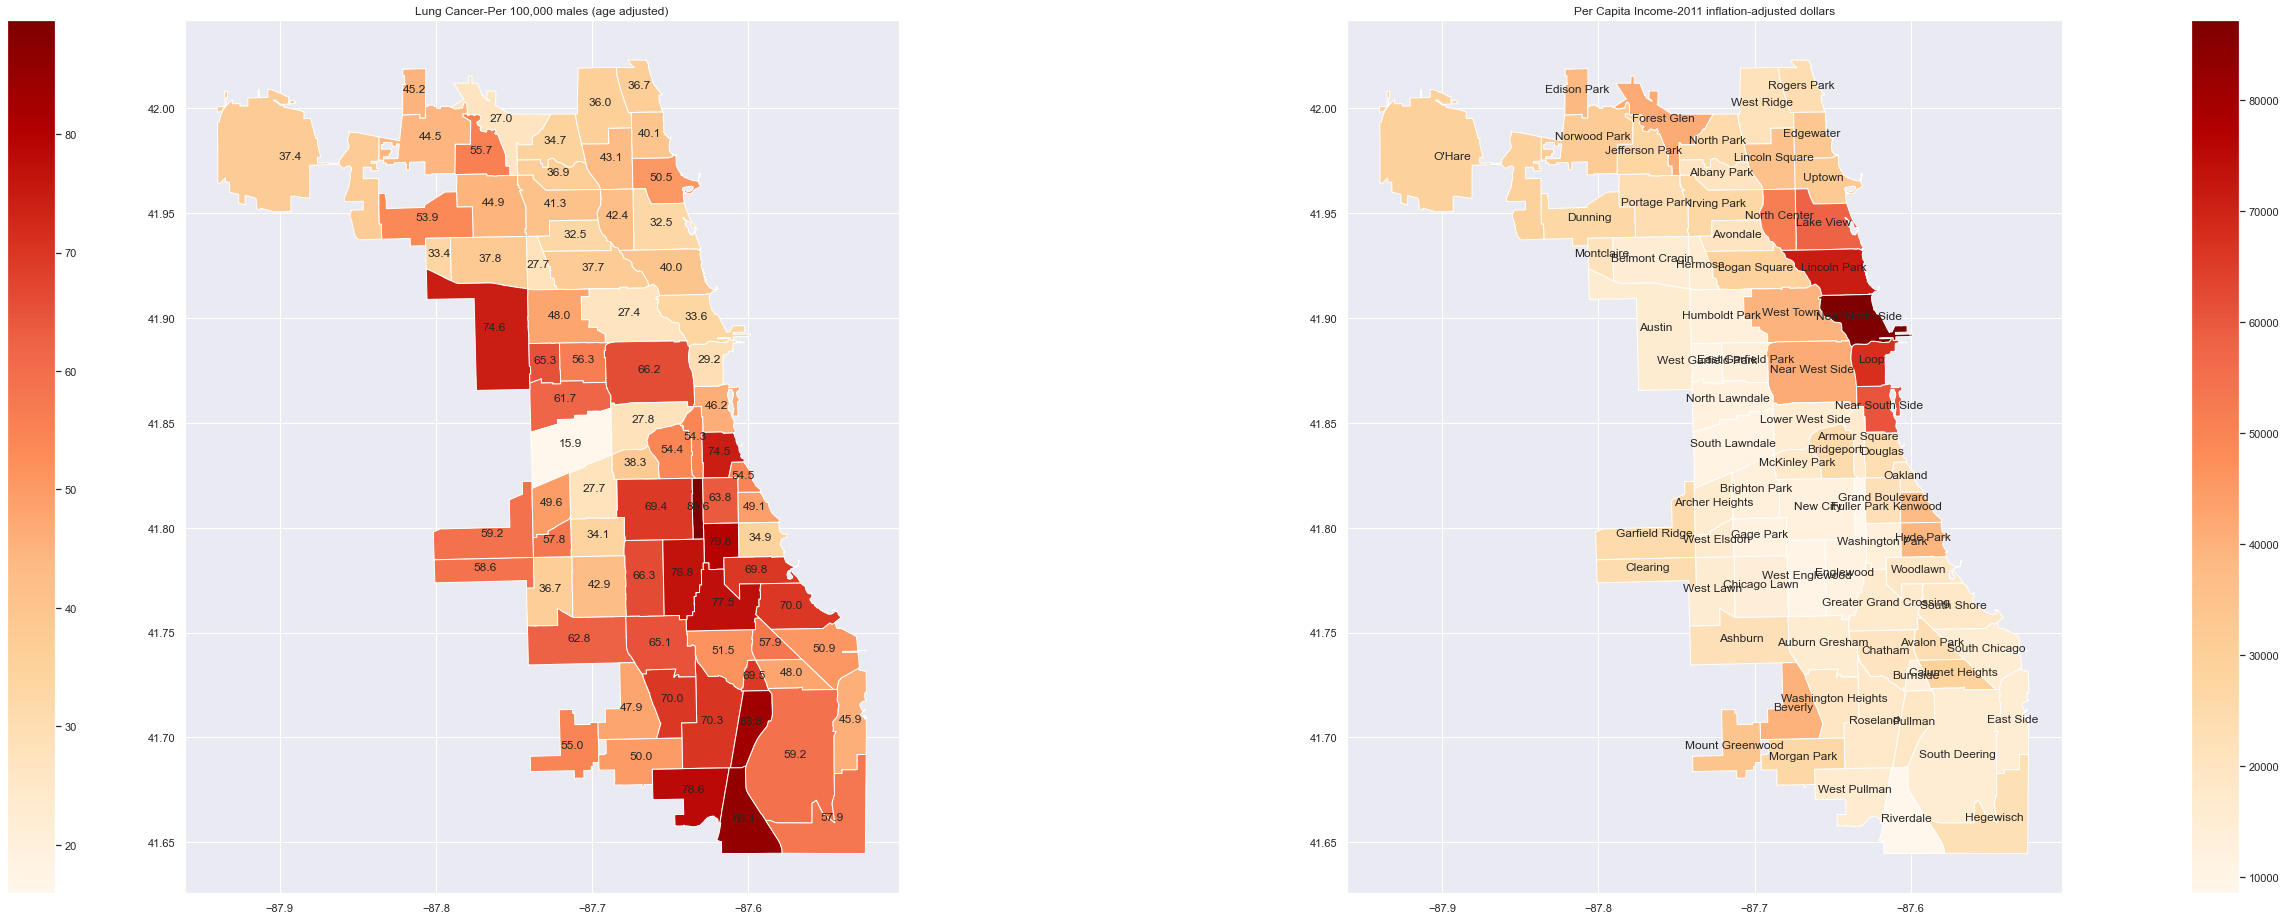

In [16]:
import geopandas as gpd
community_area=gpd.read_file(dataFp_dic["Boundaries_Community_Areas_current"])
print(community_area.dtypes) 
community_area.area_numbe=community_area.area_numbe.astype('int64')
print("_"*50)
print("boundaries_community.area_numbe dtype:",community_area.area_numbe.dtypes)
pubicHealth_gpd=community_area.merge(pubicHealth_Statistic,left_on='area_numbe', right_on='Community Area')

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
fig, axs=plt.subplots(1,2,figsize=(40, 40))

#打印第1组数据
divider=make_axes_locatable(axs[0]) 
cax_0=divider.append_axes("left", size="5%", pad=0.1) #配置图例参数
pubicHealth_gpd.plot(column='Lung Cancer',ax=axs[0],cax=cax_0,legend=True,cmap='OrRd')  #如果提示如下错误，则需要按照信息安装对应的库,ImportError: The descartes package is required for plotting polygons in geopandas. You can install it using 'conda install -c conda-forge descartes' or 'pip install descartes'.
axs[0].set_title("Lung Cancer-Per 100,000 males (age adjusted)")
pubicHealth_gpd.apply(lambda x: axs[0].annotate(s=x["Lung Cancer"], xy=x.geometry.centroid.coords[0], ha='center'),axis=1) #增加标注

#打印第2组数据
divider=make_axes_locatable(axs[1])
cax_1=divider.append_axes("right", size="5%", pad=0.1)
pubicHealth_gpd.plot(column='Per Capita Income',ax=axs[1],cax=cax_1,legend=True,cmap='OrRd')
axs[1].set_title("Per Capita Income-2011 inflation-adjusted dollars")
pubicHealth_gpd.apply(lambda x: axs[1].annotate(s=x["Community Area Name"], xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

plt.show()

### 1.3.2 公共健康数据的相关性分析
观察上图，似乎肺癌的发生比例与收入多少有关联，收入高的区域发生肺癌的机率低，相反，收入低的区域，发生肺癌的机率高。粗略的观察只能够给出一个初步不是十分确定的判断结果，如果需要以数据分析的方式证明之间是否存在关联，则需要作相关性分析。

In [38]:
pubicHealth_Statistic_mapping={'Community Area':'CommunityArea', 
                                'Community Area Name':'CommunityArea_Name',
                                'Birth Rate':'Birth_Rate',
                                'General Fertility Rate':'General_FertilityRate',
                                'Low Birth Weight':'Low_BirthWeight',
                                'Prenatal Care Beginning in First Trimester':'PrenatalCareBeginning_inFirstTrimester', 
                                'Preterm Births':'Preterm_Births',
                                'Teen Birth Rate':'TeenBirth_Rate',
                                'Assault (Homicide)':'Assault_Homicide',
                                'Breast cancer in females':'BreastCancer_infemales',
                                'Cancer (All Sites)':'Cancer_AllSites', 
                                'Colorectal Cancer':'Colorectal_Cancer',
                                'Diabetes-related':'Diabetes_related',
                                'Firearm-related':'Firearm_related',
                                'Infant Mortality Rate':'InfantMortality_Rate', 
                                'Lung Cancer':'Lung_Cancer',
                                'Prostate Cancer in Males':'ProstateCancer_inMales',
                                'Stroke (Cerebrovascular Disease)':'Stroke_CerebrovascularDisease',
                                'Childhood Blood Lead Level Screening':'ChildhoodBloodLeadLevel_Screening',
                                'Childhood Lead Poisoning':'ChildhoodLead_Poisoning',
                                'Gonorrhea in Females':'Gonorrhea_inFemales', 
                                'Gonorrhea in Males':'Gonorrhea_inMales', 
                                'Tuberculosis':'Tuberculosis',
                                'Below Poverty Level':'BelowPoverty_Level', 
                                'Crowded Housing':'Crowded_Housing', 
                                'Dependency':'Dependency',
                                'No High School Diploma':'NoHighSchool_Diploma', 
                                'Per Capita Income':'PerCapita_Income',
                                'Unemployment':'Unemployment',
                                }
pubicHealth_rename=pubicHealth_gpd.rename(columns=pubicHealth_Statistic_mapping)
pubicHealth_extract_columns=[
       'Birth_Rate','General_FertilityRate', 'Low_BirthWeight',
       'PrenatalCareBeginning_inFirstTrimester', 'Preterm_Births',
       'TeenBirth_Rate', 'Assault_Homicide', 'BreastCancer_infemales',
       'Cancer_AllSites', 'Colorectal_Cancer', 'Diabetes_related',
       'Firearm_related', 'InfantMortality_Rate', 'Lung_Cancer',
       'ProstateCancer_inMales', 'Stroke_CerebrovascularDisease',
       'ChildhoodBloodLeadLevel_Screening', 'ChildhoodLead_Poisoning',
       'Gonorrhea_inFemales', 'Gonorrhea_inMales', 'Tuberculosis',
    
       'BelowPoverty_Level', 'Crowded_Housing', 'Dependency',
       'NoHighSchool_Diploma', 'PerCapita_Income', 'Unemployment'    
]
pubicHealth_extract=pubicHealth_rename[pubicHealth_extract_columns]
publicHealth_correlation=pubicHealth_extract.corr()
print_html(publicHealth_correlation)

通过上述相关性计算，已经计算了两两之间的相关系数，为了更加清晰的查看相关系数，可以同时打印散点图（通常在计算相关系数前打印散点图，查看两个变量间的线性关系），以及更容易查看相关系数变化的热力图。

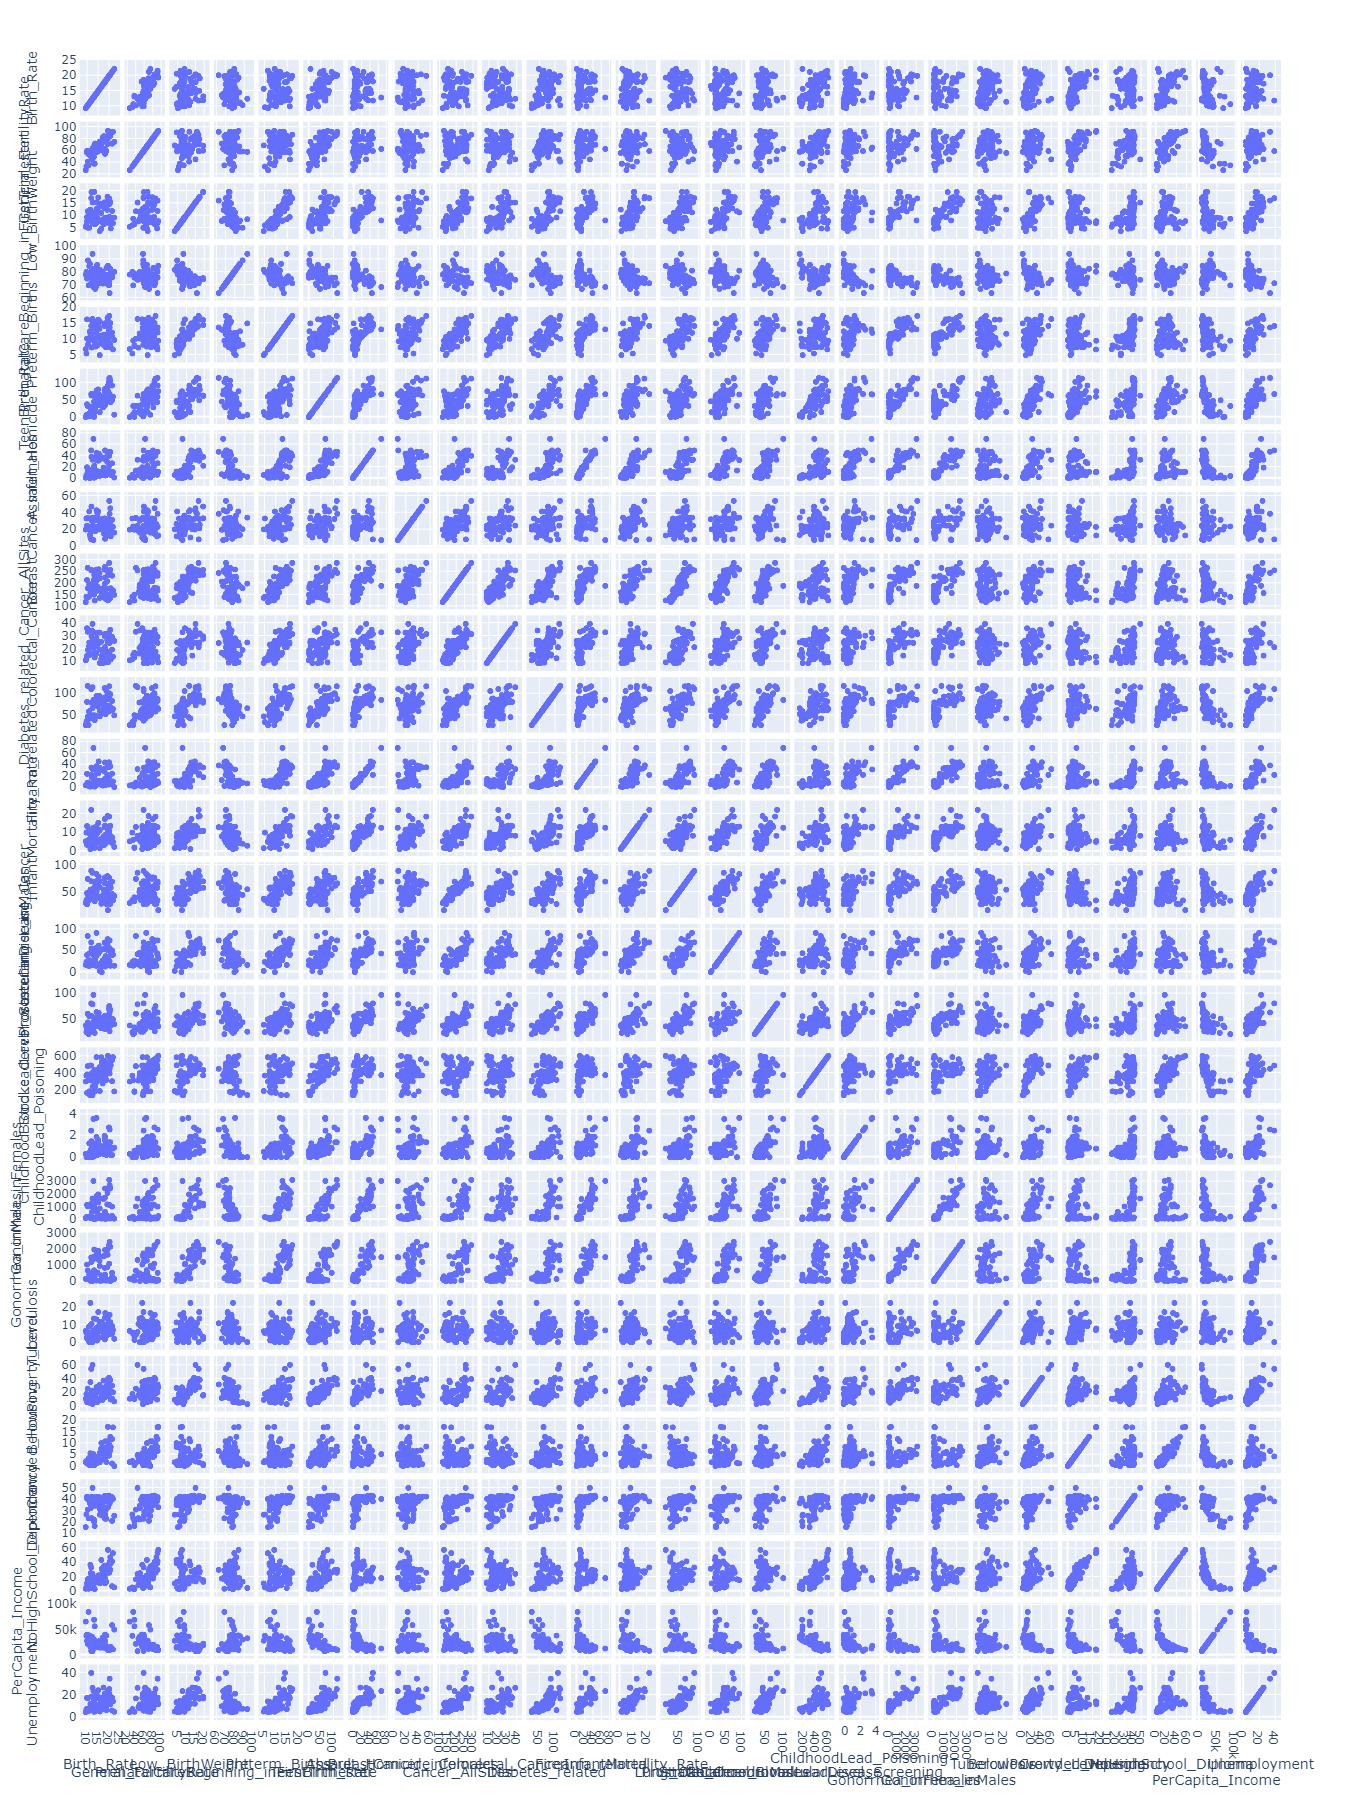

In [18]:
import plotly.express as px
fig=px.scatter_matrix(pubicHealth_extract)

fig.update_layout(
    autosize=True,
    width=1800,
    height=1800,
    )
fig.show()

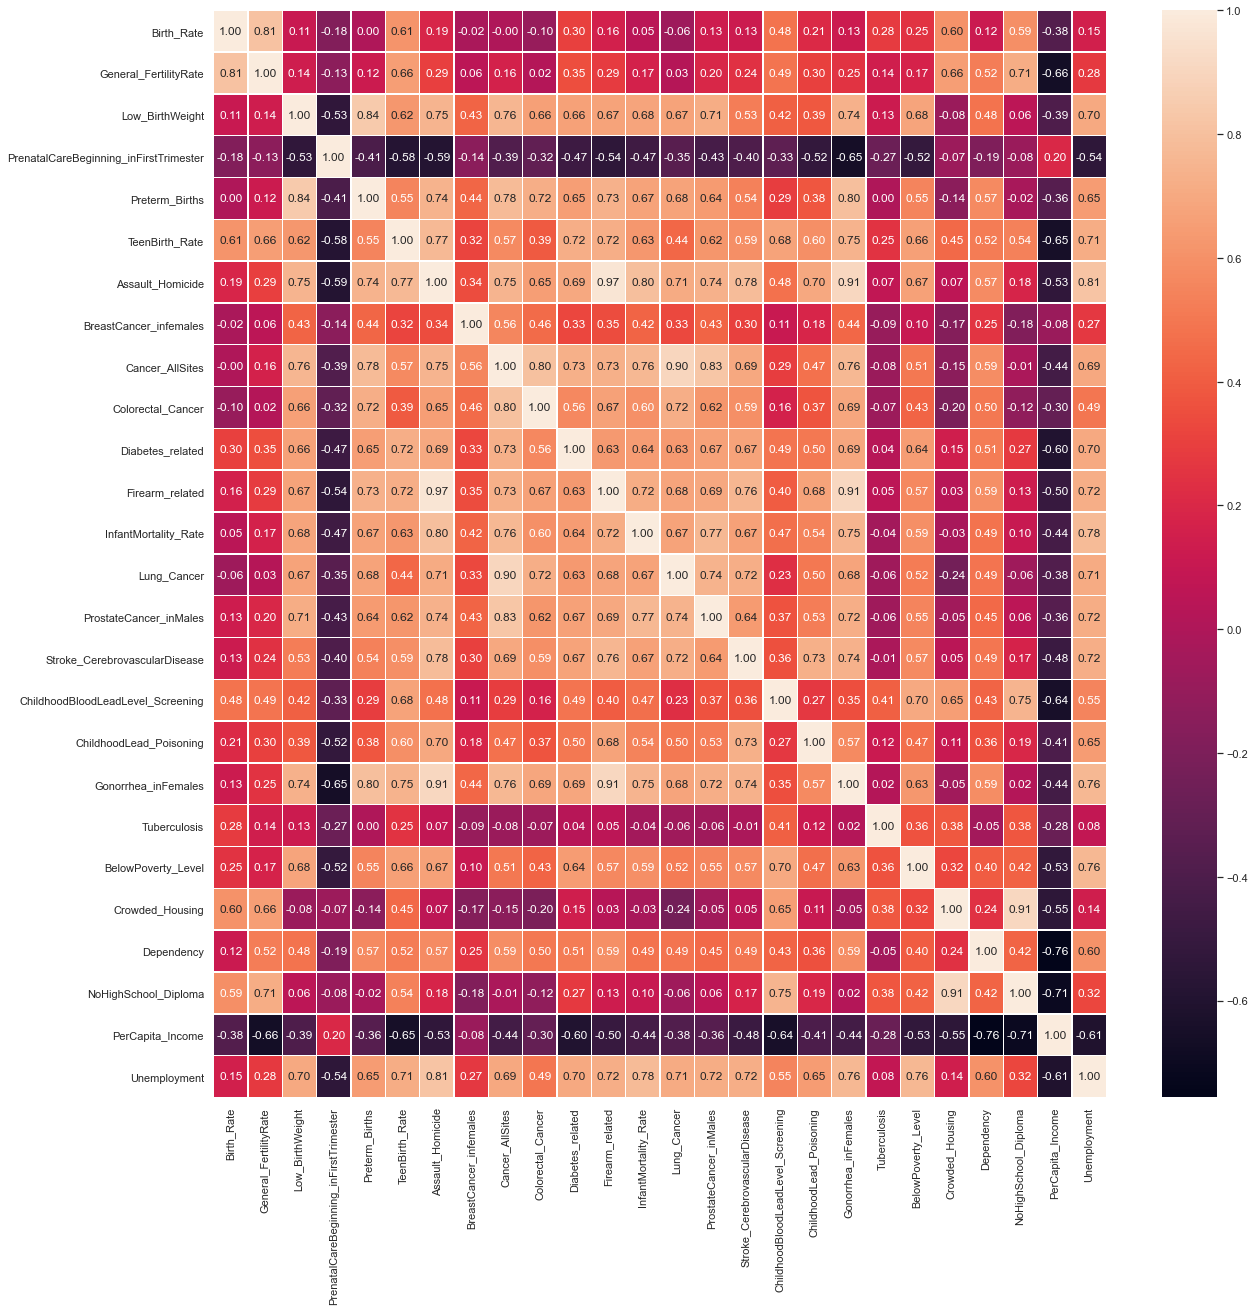

In [19]:
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(publicHealth_correlation,annot=True, fmt=".2f", linewidths=.5,)
plt.show()

不管是散点图还是热力图，以及相关系数矩阵，在观察多个两两之间相关性时，都不是很容易观察所关注的对象，因此可以根据分析的目的将需要关注的变量提取出来，只关注该变量与其它所有变量的相关系数。

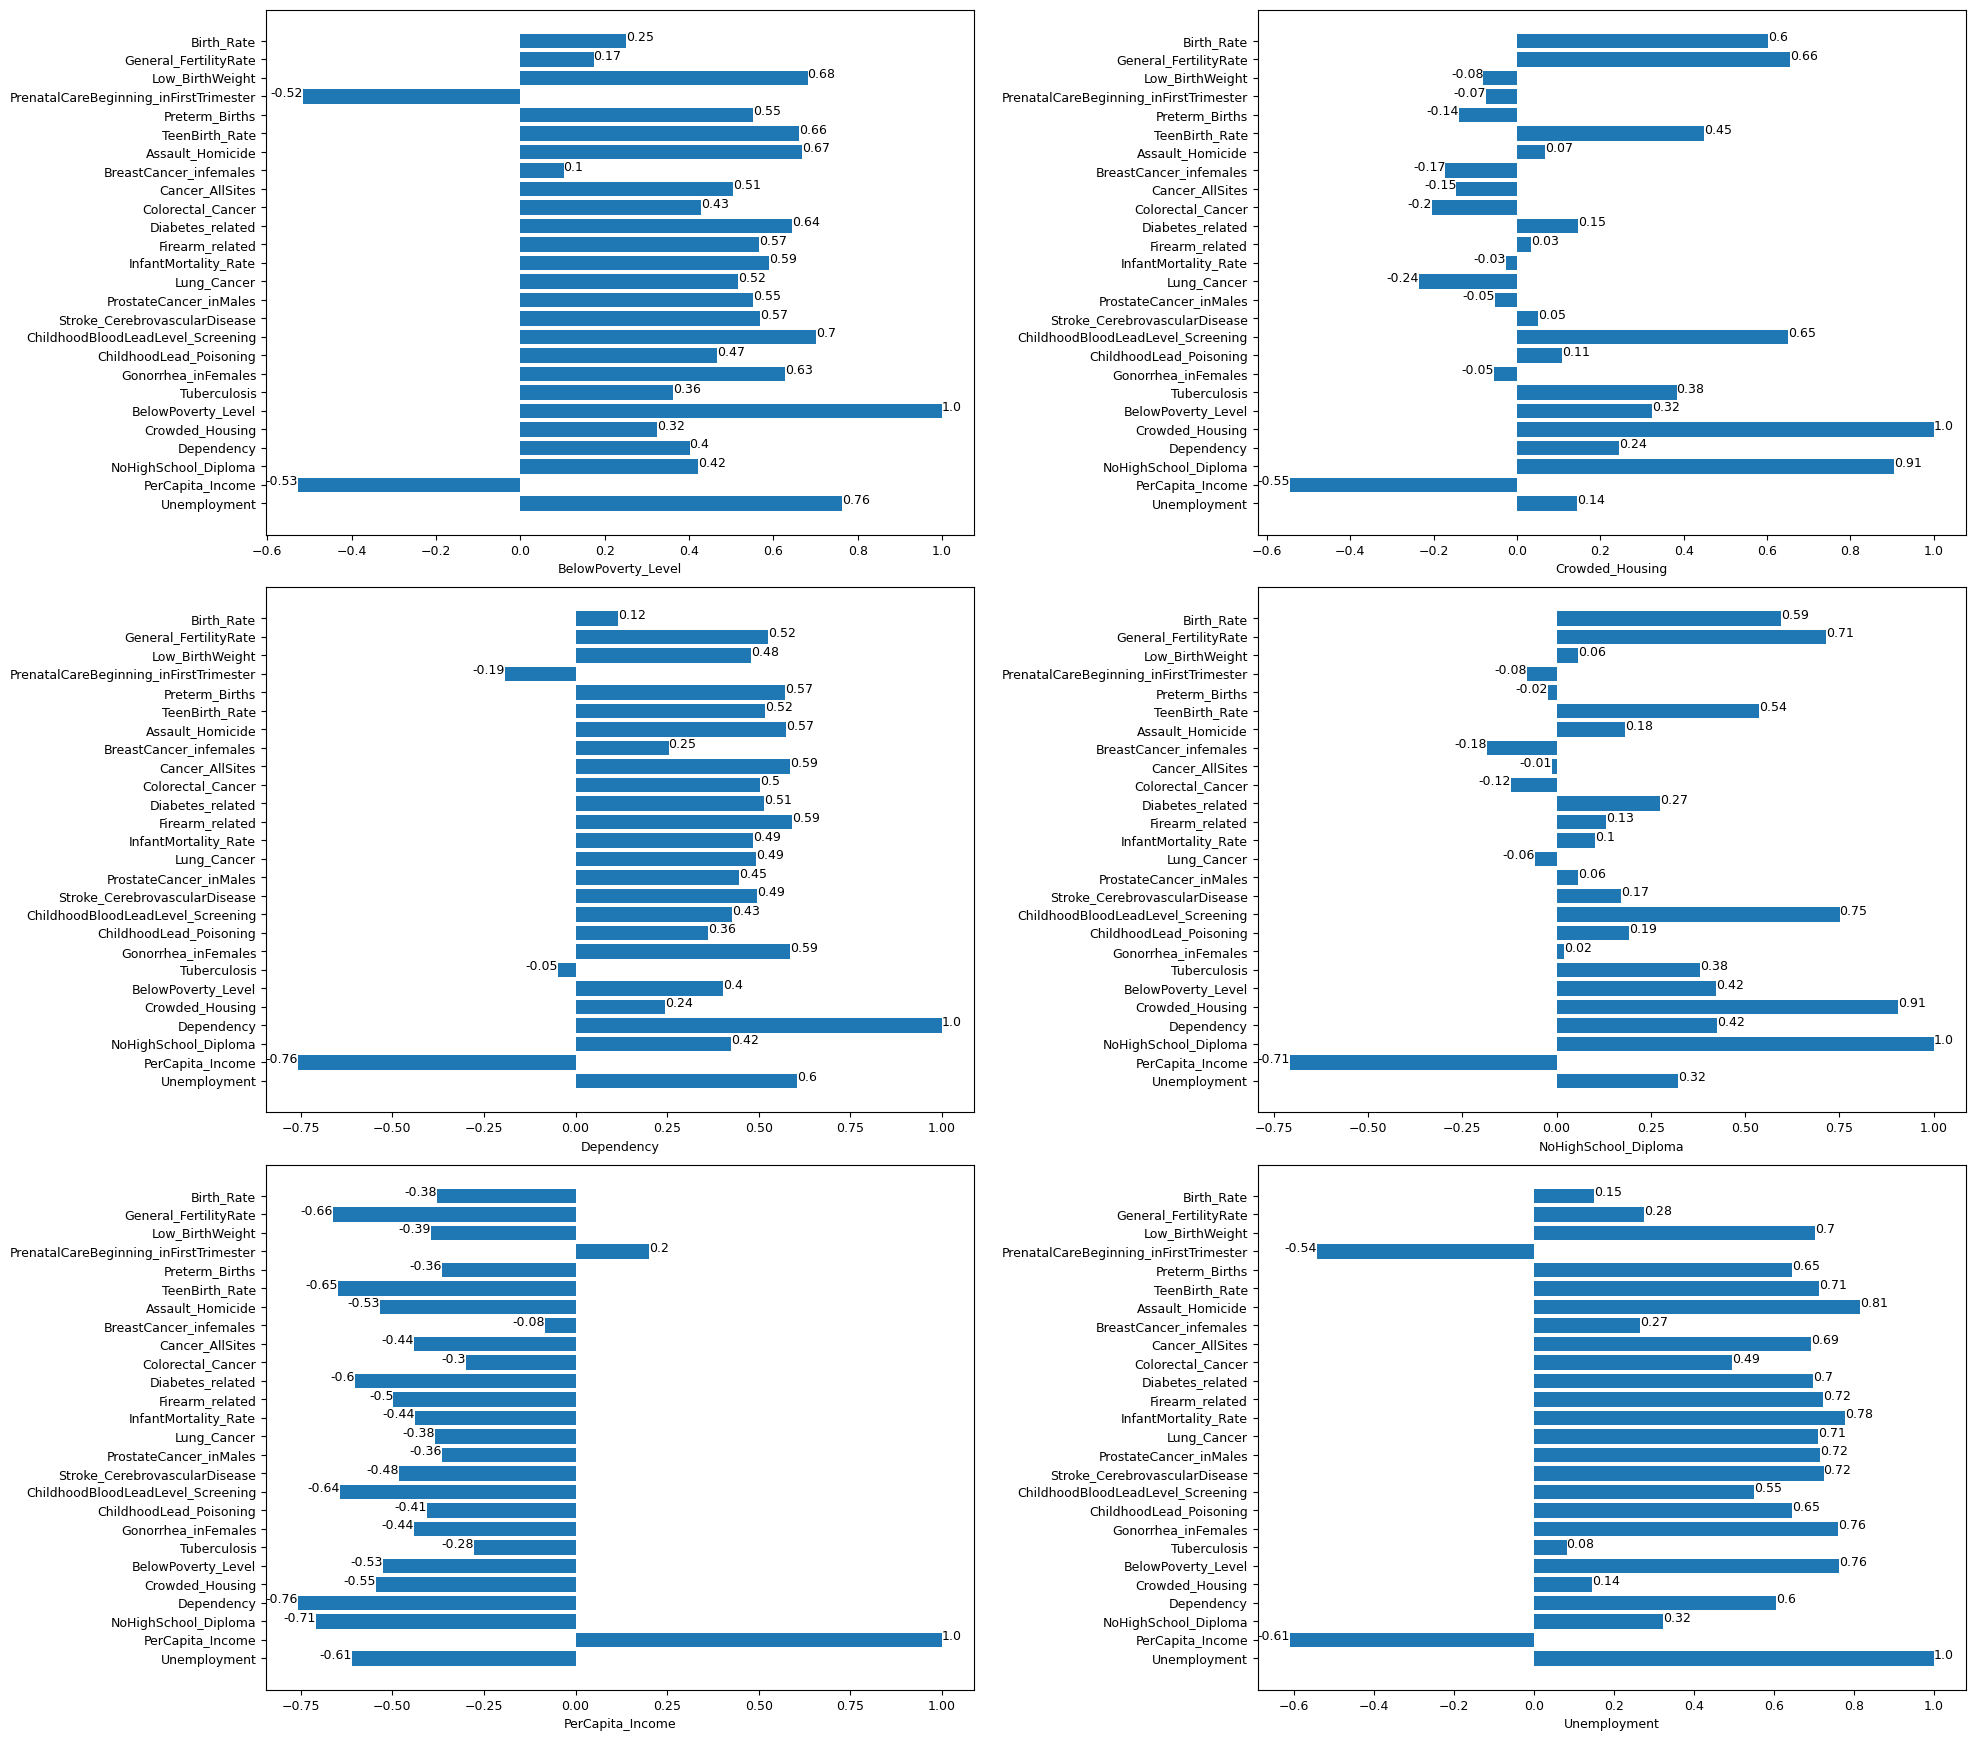

In [20]:
import numpy as np
economic_factors=['BelowPoverty_Level', 'Crowded_Housing', 'Dependency', 'NoHighSchool_Diploma', 'PerCapita_Income', 'Unemployment']
publicHealth_indicator=publicHealth_correlation[economic_factors]
publicHealth_indicator_columns=publicHealth_indicator.T.columns.to_numpy()

plt.rcdefaults()
plt.rcParams.update({'font.size':9})

nrows=3
ncols=2
fig, axs=plt.subplots(nrows=nrows,ncols=ncols,figsize=(10*2, 10*2))  
y_pos=np.arange(len(publicHealth_indicator_columns))

i=0
for idx in [(row,col) for row in range(nrows) for col in range(ncols)]:
    axs[idx].barh(y_pos, publicHealth_indicator[economic_factors[i]].to_numpy(), align='center') 
    axs[idx].set_yticks(y_pos)
    axs[idx].set_yticklabels(publicHealth_indicator_columns)
    axs[idx].invert_yaxis()  # labels read top-to-bottom
    axs[idx].set_xlabel(economic_factors[i])
    #axs.set_title(title_str)
    for index, value in enumerate(publicHealth_indicator[economic_factors[i]].to_numpy()):
        if value>=0:
            axs[idx].text(value, index, str(round(value,2)),horizontalalignment='left')
        else:
            axs[idx].text(value, index, str(round(value,2)),horizontalalignment='right')
    i+=1
    
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.1,wspace=0.4)
plt.show()

虽然计算了两两公共健康指标之间的相关系数，但这并不代表该样本所计算得出的相关性能够反映总体是否也存在样本所得出的现象，这个时候需要关注假设检验所计算得出的P值,将P值不满足显著性水平为0.05的两两变量剔除掉，所得到的结果即为能够反映总体相关性的部分。首先用所关注的变量作为index索引，为所有的经济变量`economic_factors=['BelowPoverty_Level', 'Crowded_Housing', 'Dependency', 'NoHighSchool_Diploma', 'PerCapita_Income', 'Unemployment']`，方便后续的数据分析。

In [45]:
from scipy import stats
disease_columns=[       
       'Birth_Rate','General_FertilityRate', 'Low_BirthWeight',
       'PrenatalCareBeginning_inFirstTrimester', 'Preterm_Births',
       'TeenBirth_Rate', 'Assault_Homicide', 'BreastCancer_infemales',
       'Cancer_AllSites', 'Colorectal_Cancer', 'Diabetes_related',
       'Firearm_related', 'InfantMortality_Rate', 'Lung_Cancer',
       'ProstateCancer_inMales', 'Stroke_CerebrovascularDisease',
       'ChildhoodBloodLeadLevel_Screening', 'ChildhoodLead_Poisoning',
       'Gonorrhea_inFemales', 'Gonorrhea_inMales', 'Tuberculosis',
        ]
pubicHealth_pearsonr={}

for factor in economic_factors:
    disease_temp={}
    for disease in disease_columns:
        desease_series=pd.to_numeric(pubicHealth_extract[disease],errors='coerce')
        factor_series=pd.to_numeric(pubicHealth_extract[factor],errors='coerce')
        mask=pd.notna(desease_series)&pd.notna(factor_series)
        
        disease_temp[disease]=stats.pearsonr(pd.to_numeric(factor_series[mask],errors='ignore'),pd.to_numeric(desease_series[mask],errors='ignore'))
    pubicHealth_pearsonr[factor]=disease_temp
pubicHealth_pearsonr_df=pd.DataFrame.from_dict(pubicHealth_pearsonr, orient='index').stack().to_frame(name='corr_pV')

pubicHealth_pearsonr_df['correlation']=pubicHealth_pearsonr_df.corr_pV.apply(lambda row:row[0])
pubicHealth_pearsonr_df['p_value']=pubicHealth_pearsonr_df.corr_pV.apply(lambda row:row[1])

print_html(pubicHealth_pearsonr_df)

以相关系数的值为横坐标，以相关系数所对应的P值为纵坐标，以0.05作为显著性水平，打印散点图，可以较为直观的查看哪些两两公共健康指标的相关系数能够反映或者不能够反映总体的现象。

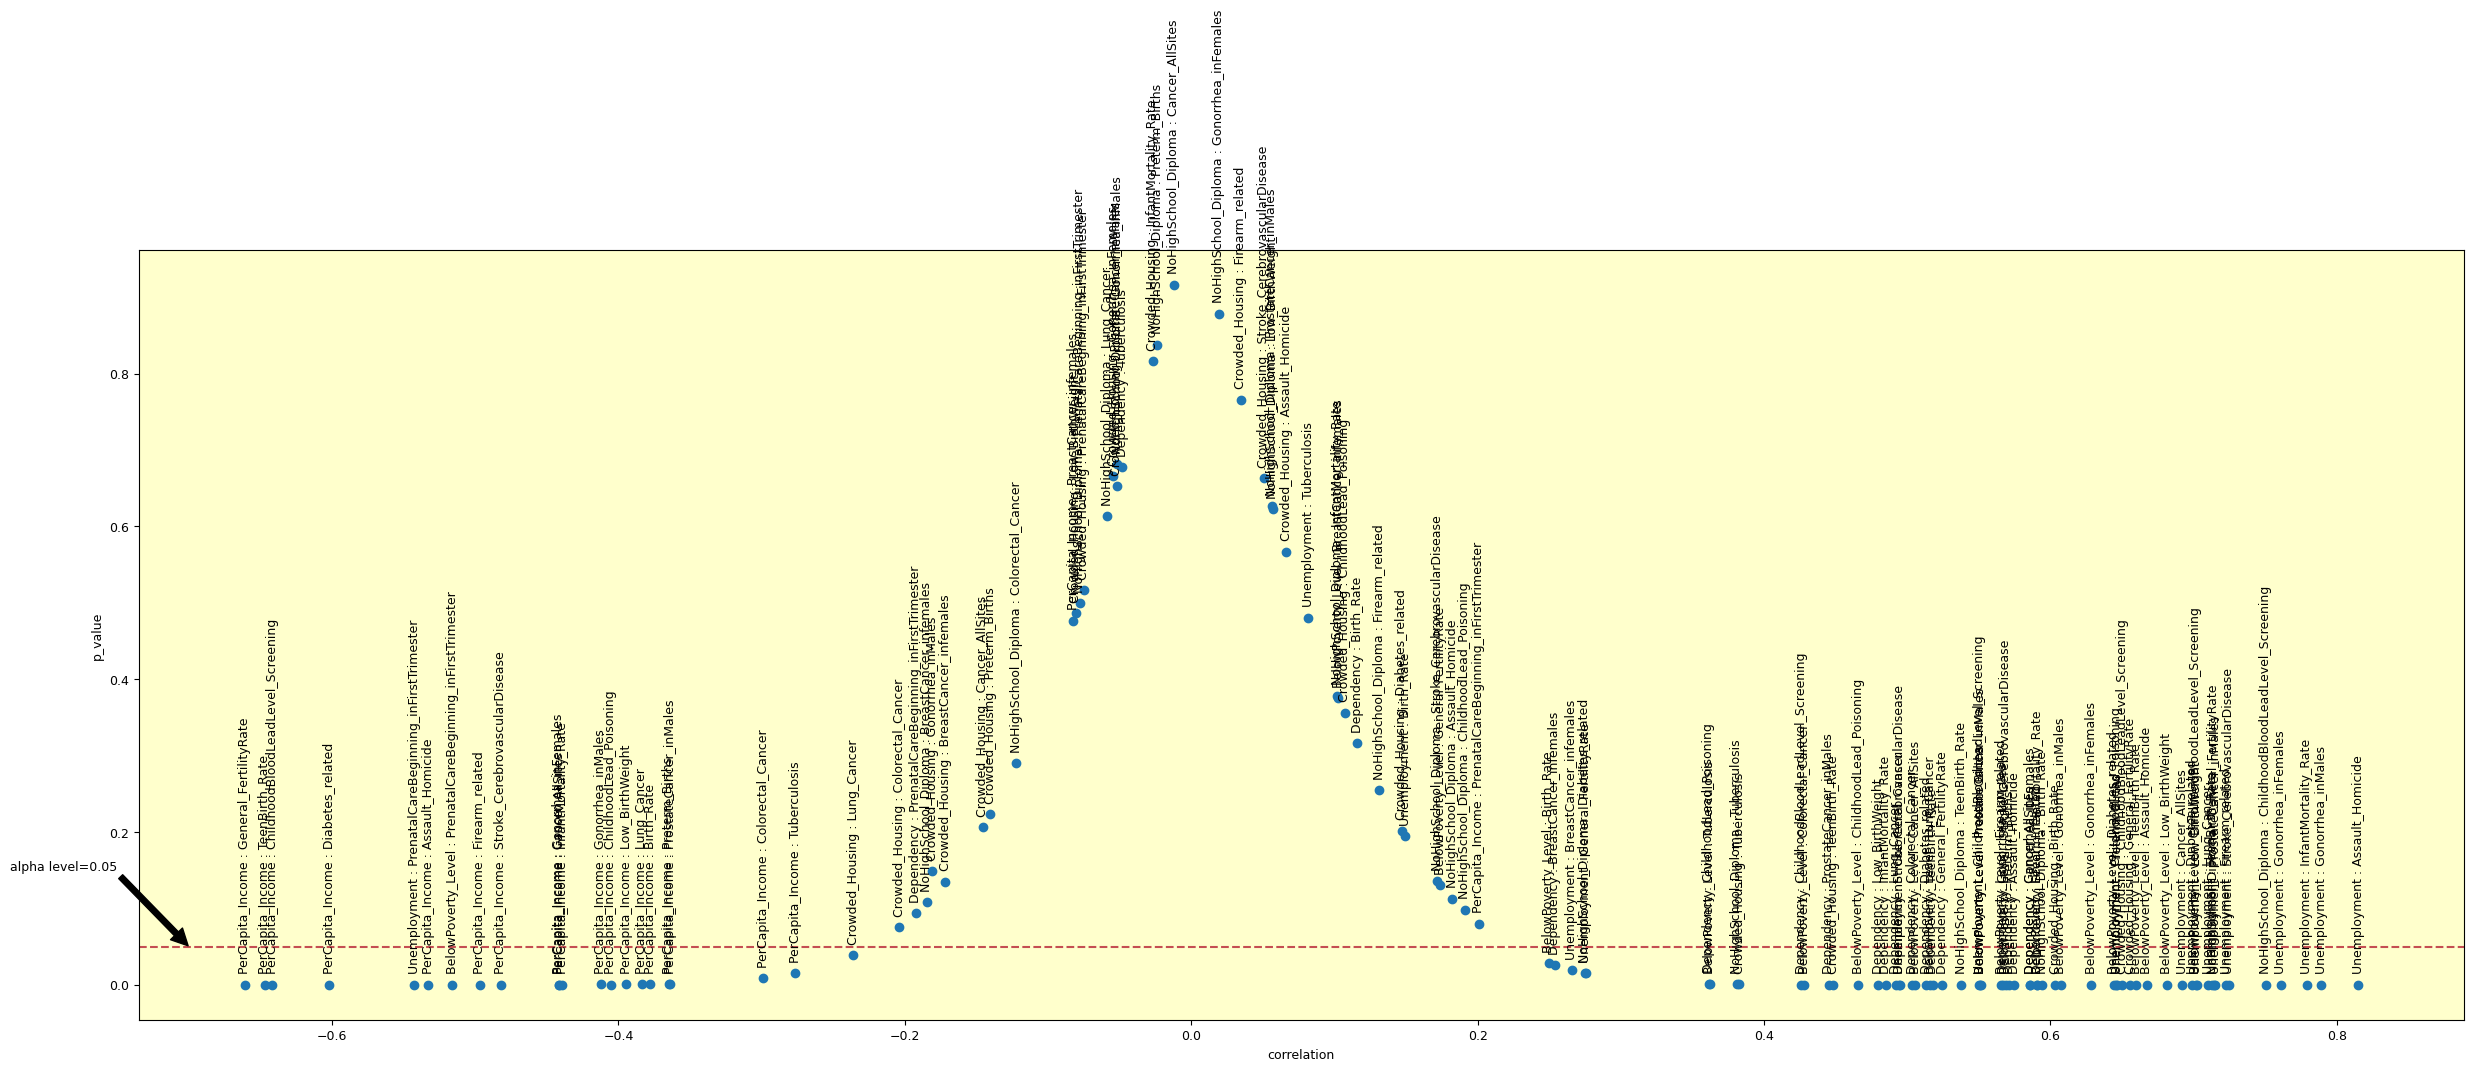

In [49]:
pubicHealth_pearsonr_resetIdx=pubicHealth_pearsonr_df.reset_index()
significance_level=0.05
fig=plt.figure(figsize=(30, 10))
ax=fig.add_subplot(111, facecolor='#FFFFCC')
X=pubicHealth_pearsonr_resetIdx.correlation
Y=pubicHealth_pearsonr_resetIdx.p_value
ax.plot(X, Y, 'o')
ax.axhline(y=significance_level,color='r',linestyle='--',label='significance_level')
i=0
for x,y in zip (X,Y):
    label=pubicHealth_pearsonr_resetIdx.loc[i].level_0+' : '+pubicHealth_pearsonr_resetIdx.loc[i].level_1
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 rotation=90
                )
    
    i+=1
plt.annotate('alpha level=%.2f'%significance_level,xy=(-0.7,significance_level),xytext=(-0.75, 0.15),arrowprops=dict(facecolor='black', shrink=0.01),horizontalalignment='right',)
plt.xlabel("correlation")
plt.ylabel("p_value")    
plt.show()

提取P值小于等于0.05的所有行，并以柱状图的形式打印相关系数结果。

In [54]:
#提取P值小于等于0.05的所有行
pubicHealth_pearsonr_alpha=pubicHealth_pearsonr_df[pubicHealth_pearsonr_df.p_value<=0.05]
print_html(pubicHealth_pearsonr_alpha)

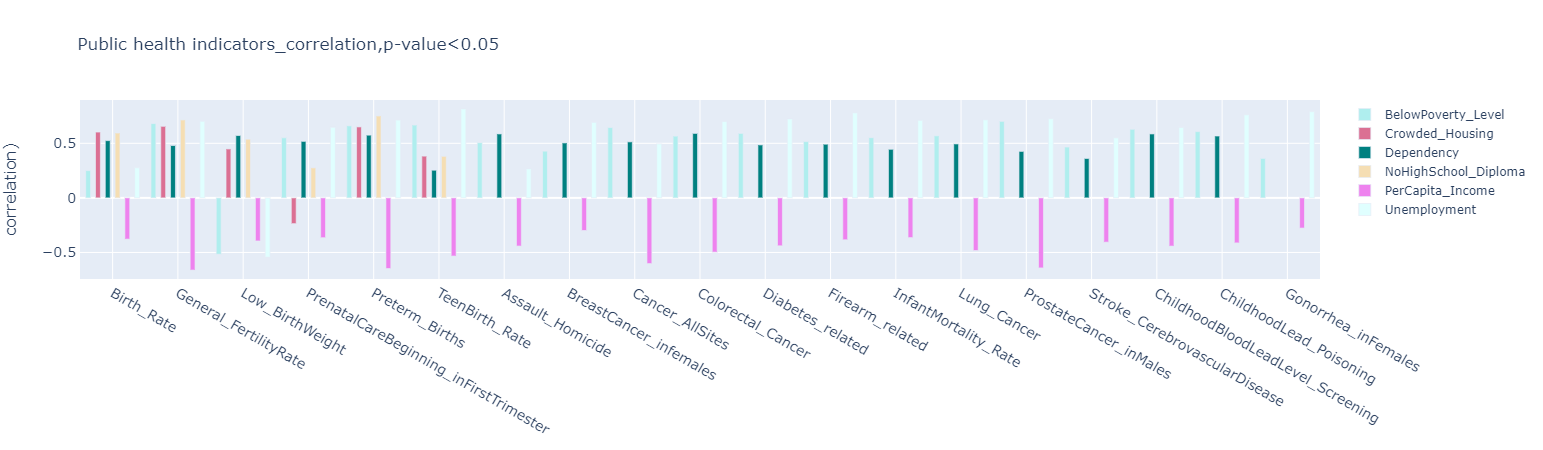

In [111]:
import plotly.graph_objects as go
import random

def generate_colors():
    import matplotlib
    '''
    function - 生成颜色列表或者字典
    '''
    hex_colors_dic={}
    rgb_colors_dic={}
    hex_colors_only=[]
    for name, hex in matplotlib.colors.cnames.items():
        hex_colors_only.append(hex)
        hex_colors_dic[name]=hex
        rgb_colors_dic[name]=matplotlib.colors.to_rgb(hex)
    return hex_colors_only,hex_colors_dic,rgb_colors_dic
generate_colors,_,_=generate_colors()

economic_factors=['BelowPoverty_Level', 'Crowded_Housing', 'Dependency', 'NoHighSchool_Diploma', 'PerCapita_Income', 'Unemployment']
fig = go.Figure()

for idx,data in pubicHealth_pearsonr_alpha.groupby(level=0):
    fig.add_trace(go.Bar(x=disease_columns,
                    y=data.correlation,
                    name=idx,
                    marker_color=random.choice(hex_colors_only)
                    ))

fig.update_layout(
    title='Public health indicators_correlation,p-value<0.05',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='correlation)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    barmode='group',
    bargap=0.1, # gap between bars of adjacent location coordinates.
    bargroupgap=0.5 # gap between bars of the same location coordinate.
)
fig.show()

### 1.4 要点
#### 1.4.1 数据处理技术

* 统计部分计算主要基于scipy.stats库，以及numpy库

* 为GeoDataFrame格式数据图表打印增加标注，pubicHealth_gpd.apply(lambda x: axs[0].annotate(s=x["Lung Cancer"], xy=x.geometry.centroid.coords[0], ha='center'),axis=1) #增加标注

#### 1.4.2 新建立的函数

* function - 在Jupyter中打印DataFrame格式数据为HTML, `print_html(df,row_numbers=5`

* function - 生成颜色列表或者字典， `generate_colors()`

#### 1.4.3 所调用的库

In [ ]:
import numpy as np
from scipy import stats
import seaborn as sns
import math
import matplotlib.pyplot as plt 
import pandas as pd
from scipy.stats import norm
from scipy.stats import t
from IPython.display import HTML
import geopandas as gpd
import plotly.express as px

#### 1.4.4 参考文献
1. Timothy C.Urdan.Statistics in Plain English (白话统计学)[M].中国人民大学出版社.2013,12.第3版.
2. (日)高桥 信著,株式会社TREND-PRO漫画制作，陈刚译.漫画统计学[M].科学出版社.北京.